<a href="https://colab.research.google.com/github/WISEPLAT/_NN/blob/main/Trade_Python_NN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from datetime import timedelta
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
from typing import List

In [ ]:
import time

In [ ]:
pip install yfinance


     |████████████████████████████████| 6.3 MB 12.1 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=70fafcc3eb34e800609f59e9dd2315532507ec29b650b4b1baf50795e1bfe551
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf

In [ ]:
data = yf.download("MSFT", start="2000-01-01", end="2021-10-21")

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.shape

(5486, 6)

In [ ]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,58.687500,59.312500,56.000000,58.281250,36.861534,53228400
2000-01-04,56.781250,58.562500,56.125000,56.312500,35.616325,54119000
2000-01-05,55.562500,58.187500,54.687500,56.906250,35.991882,64059600
2000-01-06,56.093750,56.937500,54.187500,55.000000,34.786205,54976600
2000-01-07,54.312500,56.125000,53.656250,55.718750,35.240807,62013600
...,...,...,...,...,...,...
2021-10-14,299.209991,303.269989,297.829987,302.750000,302.750000,27262900
2021-10-15,302.339996,304.450012,300.519989,304.209991,304.209991,25374700
2021-10-18,303.570007,308.209991,302.690002,307.290009,307.290009,22729300


In [ ]:
data = data.reset_index()

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,58.687500,59.312500,56.000000,58.281250,36.861534,53228400
1,2000-01-04,56.781250,58.562500,56.125000,56.312500,35.616325,54119000
2,2000-01-05,55.562500,58.187500,54.687500,56.906250,35.991882,64059600
3,2000-01-06,56.093750,56.937500,54.187500,55.000000,34.786205,54976600
4,2000-01-07,54.312500,56.125000,53.656250,55.718750,35.240807,62013600
...,...,...,...,...,...,...,...
5481,2021-10-14,299.209991,303.269989,297.829987,302.750000,302.750000,27262900
5482,2021-10-15,302.339996,304.450012,300.519989,304.209991,304.209991,25374700
5483,2021-10-18,303.570007,308.209991,302.690002,307.290009,307.290009,22729300
5484,2021-10-19,308.350006,309.299988,307.220001,308.230011,308.230011,17682100


In [ ]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,58.687500,59.312500,56.000000,58.281250,36.861534,53228400
1,2000-01-04,56.781250,58.562500,56.125000,56.312500,35.616325,54119000
2,2000-01-05,55.562500,58.187500,54.687500,56.906250,35.991882,64059600
3,2000-01-06,56.093750,56.937500,54.187500,55.000000,34.786205,54976600
4,2000-01-07,54.312500,56.125000,53.656250,55.718750,35.240807,62013600
...,...,...,...,...,...,...,...
5481,2021-10-14,299.209991,303.269989,297.829987,302.750000,302.750000,27262900
5482,2021-10-15,302.339996,304.450012,300.519989,304.209991,304.209991,25374700
5483,2021-10-18,303.570007,308.209991,302.690002,307.290009,307.290009,22729300
5484,2021-10-19,308.350006,309.299988,307.220001,308.230011,308.230011,17682100


In [ ]:
data["Date"].min(), data["Date"].max()

(Timestamp('2000-01-03 00:00:00'), Timestamp('2021-10-20 00:00:00'))

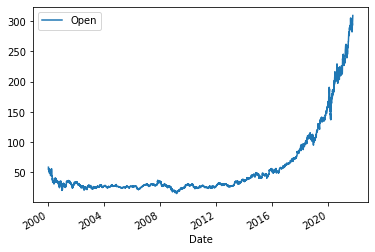

In [ ]:
data.plot(x="Date", y="Open")

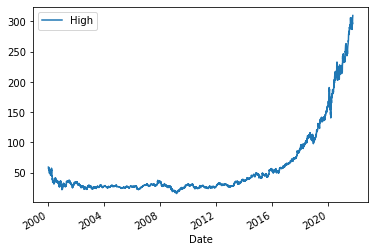

In [ ]:
data.plot(x="Date", y="High")

In [ ]:
data[["Open", "High","Low","Close"]].corr()

,Open,High,Low,Close
Open,1.000000,0.999916,0.999911,0.999831
High,0.999916,1.000000,0.999862,0.999906
Low,0.999911,0.999862,1.000000,0.999915
Close,0.999831,0.999906,0.999915,1.000000


In [ ]:
data_6_yr = data[data["Date"] > data["Date"].max() - timedelta(days=365*6)]

In [ ]:
data_6_yr["Date"].min(), data_6_yr["Date"].max()

(Timestamp('2015-10-23 00:00:00'), Timestamp('2021-10-20 00:00:00'))

In [ ]:
data_6_yr.shape

(1509, 7)

In [ ]:
train_size = int(data_6_yr.shape[0]*0.8)
train_data = data_6_yr.iloc[:train_size]
validate_data = data_6_yr.iloc[train_size:]

In [ ]:
train_data.shape, validate_data.shape

((1207, 7), (302, 7))

In [ ]:
train_data["Date"].min(), train_data["Date"].max()

(Timestamp('2015-10-23 00:00:00'), Timestamp('2020-08-10 00:00:00'))

In [ ]:
validate_data["Date"].min(), validate_data["Date"].max()

(Timestamp('2020-08-11 00:00:00'), Timestamp('2021-10-20 00:00:00'))

In [ ]:
scaler = StandardScaler()
scaler.fit(train_data[["Low"]])

def make_dataset(
    df,                 #данные для создания датасета
    window_size,        #кол. элементов для предсказания след. элемента
    batch_size,         #кол. элементов в batch для обучения
    use_scaler=True,    #использовать ли Scaler для нормализации свечей
    shuffle=True        #смешивать элементы в датасете или нет
):
  features = df[["Low"]].iloc[:-window_size]      #-N предыдущих элементов как фичи, поэтому вычитаем
  if use_scaler:                                  #нормализуем фичи, если нужно
    features=scaler.transform(features)
  data = np.array(features, dtype=np.float32)     #приводим данные к нужному типу
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(    #создание датасета с временным рядом для обучения НС
      data=data,                                  #принимает многомерный массив, кот. содержит фичи
      targets=df["Low"].iloc[window_size:],       #принимает лейблы, которые нужно сдвинуть на +N элементов
                                                  #т.е. для каждых N элементов из фичей будем иметь N+1 элемент как лейбл
      sequence_length=window_size,                #принимает длину нашей последовательности window_size
      sequence_stride=1,                          #на сколько нужно сдвигать элемент для создания нового семпла, т.е. предсказываем каждый след. элемент
      shuffle=shuffle,                            #нужно ли перемешивать элементы
      batch_size=batch_size                       #какой размер батча
  )
  return ds  


In [ ]:
example_ds = make_dataset(df=train_data, window_size=3, batch_size=2, use_scaler=False, shuffle=False)

In [ ]:
example_feature, example_label = next(example_ds.as_numpy_iterator())

In [ ]:
example_feature.shape

(2, 3, 1)

In [ ]:
example_label.shape

(2,)

In [ ]:
train_data["Low"].iloc[:6]

3977    52.250000
3978    52.500000
3979    53.580002
3980    52.860001
3981    53.220001
3982    52.619999
Name: Low, dtype: float64

In [ ]:
print(example_feature[0])
print(example_label[0])

[[52.25]
 [52.5 ]
 [53.58]]
52.86000061035156


In [ ]:
print(example_feature[1])
print(example_label[1])

[[52.5 ]
 [53.58]
 [52.86]]
53.220001220703125


In [ ]:
window_size=10
batch_size=8
train_ds = make_dataset(df=train_data, window_size=window_size, batch_size=batch_size, use_scaler=True, shuffle=True)
val_ds = make_dataset(df=validate_data, window_size=window_size, batch_size=batch_size, use_scaler=True, shuffle=True)

In [ ]:
train_ds

<BatchDataset shapes: ((None, None, 1), (None,)), types: (tf.float32, tf.float64)>

In [ ]:
val_ds

<BatchDataset shapes: ((None, None, 1), (None,)), types: (tf.float32, tf.float64)>

In [ ]:
lstm_model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(32, return_sequences=False),
  tf.keras.layers.Dense(1)
])

In [ ]:
def compile_and_fit(model, train_ds, val_ds, num_epochs: int = 20): #принимает модель, тренировочный датасет, валидационный датасет и кол. эпох для тренировки
  model.compile(                              #сперва модель компилируется
      loss=tf.losses.MeanSquaredError(),      #передаем функцию потерь, исп. для обучения - Это регресия - предск. вещ. числа - для этой задачи исп. MeanSquaredError
      optimizer=tf.optimizers.Adam(),         #передаем функцию оптимизации, кот. используется для оптимизации функции потерь
      metrics=[tf.metrics.MeanAbsoluteError()]    #передается массив метрик, для просмотра как происходит обучение, как наши метрики меняются - растут/уменьшаются или остаются на месте
  )
  history = model.fit(                        #здесь происходит обучение
      train_ds,                               #передаем тренировочный датасет, на котором будет происходить обучение
      epochs=num_epochs,                      #кол. эпох - сколько раз полностью пройдемся по всему тренировочному датасету - сколько раз мы используем все семплы из тренировочного датасета для обучения
      validation_data=val_ds,                 #передаем те данные, по которым можно расчитывать валидационные метрики - на которых можно понять наша модель переобучается или нет
      verbose=0                               #выводить ли промежуточную информацию во время обучения
  )
  return history                              #объект с помощью которого можно напечатать значения метрик во время эпох

In [ ]:
start_time = time.time()
lstm_model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(32, return_sequences=False),
  tf.keras.layers.Dense(1)
])
history = compile_and_fit(lstm_model, train_ds, val_ds, num_epochs=100)
print("--- %s seconds ---" % (time.time() - start_time))

--- 118.48243975639343 seconds ---


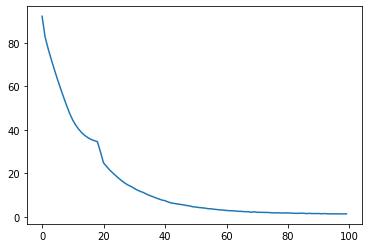

In [ ]:
plt.plot(history.history['mean_absolute_error'])

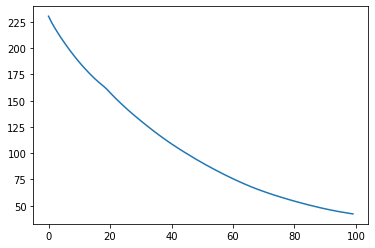

In [ ]:
plt.plot(history.history['val_mean_absolute_error'])

In [ ]:
lstm_model.evaluate(train_ds)

149/149 [==============================] - 1s 3ms/step - loss: 4.2422 - mean_absolute_error: 1.2585


[4.242186069488525, 1.2585031986236572]

In [ ]:
lstm_model.evaluate(val_ds)

36/36 [==============================] - 0s 3ms/step - loss: 2695.0029 - mean_absolute_error: 42.1927


[2695.0029296875, 42.192726135253906]

In [ ]:
start_time = time.time()
lstm_model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(32, return_sequences=False),
  tf.keras.layers.Dense(1)
])
history = compile_and_fit(lstm_model, train_ds, val_ds, num_epochs=500)
print("--- %s seconds ---" % (time.time() - start_time))

--- 579.0474197864532 seconds ---


In [ ]:
lstm_model.evaluate(train_ds)

149/149 [==============================] - 0s 3ms/step - loss: 2.7994 - mean_absolute_error: 1.0814


[2.7993855476379395, 1.081403136253357]

In [ ]:
lstm_model.evaluate(val_ds)

36/36 [==============================] - 0s 3ms/step - loss: 2735.3262 - mean_absolute_error: 40.9284


[2735.326171875, 40.92841339111328]

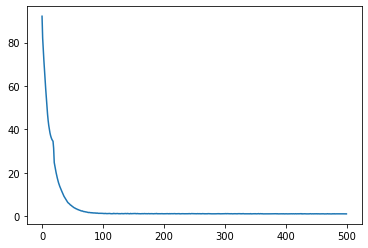

In [ ]:
plt.plot(history.history['mean_absolute_error'])

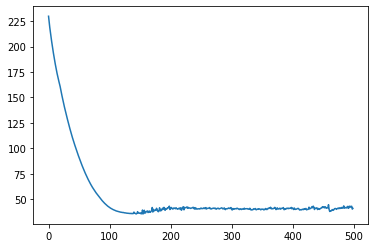

In [ ]:
plt.plot(history.history['val_mean_absolute_error'])

In [ ]:
start_time = time.time()
lstm_model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(32, return_sequences=False),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1)
])
history = compile_and_fit(lstm_model, train_ds, val_ds, num_epochs=500)
print("--- %s seconds ---" % (time.time() - start_time))

--- 592.4240515232086 seconds ---


In [ ]:
lstm_model.evaluate(train_ds)

149/149 [==============================] - 1s 3ms/step - loss: 5.5102 - mean_absolute_error: 1.6162


[5.510150909423828, 1.6162093877792358]

In [ ]:
lstm_model.evaluate(val_ds)

36/36 [==============================] - 0s 3ms/step - loss: 1203.0651 - mean_absolute_error: 26.1930


[1203.0650634765625, 26.193008422851562]

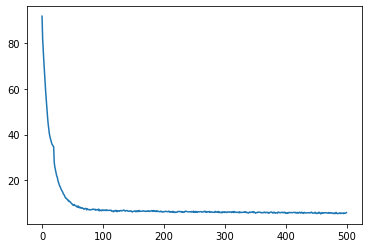

In [ ]:
plt.plot(history.history['mean_absolute_error'])

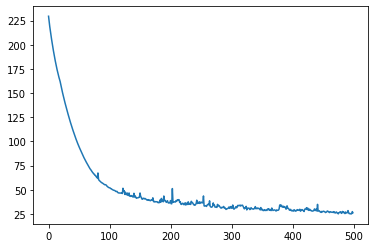

In [ ]:
plt.plot(history.history['val_mean_absolute_error'])

In [ ]:
msft = yf.Ticker("MSFT")

# get stock info
msft.info

# get historical market data
hist = msft.history(period="max")

# show actions (dividends, splits)
msft.actions

# show dividends
msft.dividends

# show splits
msft.splits

# show financials
msft.financials
msft.quarterly_financials

# show major holders
msft.major_holders

# show institutional holders
msft.institutional_holders

# show balance sheet
msft.balance_sheet
msft.quarterly_balance_sheet

# show cashflow
msft.cashflow
msft.quarterly_cashflow

# show earnings
msft.earnings
msft.quarterly_earnings

# show sustainability
msft.sustainability

# show analysts recommendations
msft.recommendations

# show next event (earnings, etc)
msft.calendar

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
msft.isin

# show options expirations
msft.options

# get option chain for specific expiration
#opt = msft.option_chain('YYYY-MM-DD')
# data available via: opt.calls, opt.puts

('2021-10-22',
 '2021-10-29',
 '2021-11-05',
 '2021-11-12',
 '2021-11-19',
 '2021-11-26',
 '2021-12-17',
 '2022-01-21',
 '2022-02-18',
 '2022-03-18',
 '2022-04-14',
 '2022-06-17',
 '2022-09-16',
 '2023-01-20',
 '2023-03-17',
 '2023-06-16',
 '2024-01-19')

In [ ]:
# get stock info
msft.info

{'52WeekChange': 0.41326678,
 'SandP52WeekChange': 0.2951163,
 'address1': 'One Microsoft Way',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 304.3,
 'askSize': 900,
 'averageDailyVolume10Day': 22009328,
 'averageVolume': 22968657,
 'averageVolume10days': 22009328,
 'beta': 0.802645,
 'beta3Year': None,
 'bid': 304.21,
 'bidSize': 900,
 'bookValue': 18.884,
 'category': None,
 'circulatingSupply': None,
 'city': 'Redmond',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'currentPrice': 304.21,
 'currentRatio': 2.08,
 'dateShortInterest': 1632960000,
 'dayHigh': 304.45,
 'dayLow': 300.52,
 'debtToEquity': 57.947,
 'dividendRate': 2.48,
 'dividendYield': 0.0082,
 'earningsGrowth': 0.486,
 'earningsQuarterlyGrowth': 0.469,
 'ebitda': 80815996928,
 'ebitdaMargins': 0.48080003,
 'enterpriseToEbitda': 27.558,
 'enterpriseToRevenue': 13.25,
 'enterpriseValue': 2227155238912,
 'exDividendDate': 1637107200,
 'exchange':

In [ ]:
# get historical market data
hist = msft.history(period="max")

In [ ]:
# show actions (dividends, splits)
msft.actions

,Dividends,Stock Splits
Date,,
1987-09-21,0.00,2.0
1990-04-16,0.00,2.0
1991-06-27,0.00,1.5
1992-06-15,0.00,1.5
1994-05-23,0.00,2.0
...,...,...
2020-08-19,0.51,0.0
2020-11-18,0.56,0.0
2021-02-17,0.56,0.0


In [ ]:
# show dividends
msft.dividends

Date
2003-02-19    0.08
2003-10-15    0.16
2004-08-23    0.08
2004-11-15    3.08
2005-02-15    0.08
              ... 
2020-08-19    0.51
2020-11-18    0.56
2021-02-17    0.56
2021-05-19    0.56
2021-08-18    0.56
Name: Dividends, Length: 71, dtype: float64

In [ ]:
# show splits
msft.splits

Date
1987-09-21    2.0
1990-04-16    2.0
1991-06-27    1.5
1992-06-15    1.5
1994-05-23    2.0
1996-12-09    2.0
1998-02-23    2.0
1999-03-29    2.0
2003-02-18    2.0
Name: Stock Splits, dtype: float64

In [ ]:
# show financials
msft.financials
msft.quarterly_financials

,2021-06-30,2021-03-31,2020-12-31,2020-09-30
Research Development,5.687e+09,5.204e+09,4.899e+09,4.926e+09
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,1.9405e+10,1.7236e+10,1.8337e+10,1.6124e+10
Minority Interest,None,None,None,None
Net Income,1.6458e+10,1.5457e+10,1.5463e+10,1.3893e+10
Selling General Administrative,7.379e+09,6.409e+09,6.086e+09,5.35e+09
Gross Profit,3.2161e+10,2.8661e+10,2.8882e+10,2.6152e+10
Ebit,1.9095e+10,1.7048e+10,1.7897e+10,1.5876e+10
Operating Income,1.9095e+10,1.7048e+10,1.7897e+10,1.5876e+10
Other Operating Expenses,None,None,None,None
